In [1]:
#Debugging 01-09-2023
#UI == pygame
#Implementado gráfico Max-Boltz
#Penso em modificar a detecção de colisão por grids menores e 'swept sphere'
#Colisões funcionam (inherited from ver5)
import math
import random
import pygame
from pygame.locals import *
from sys import exit
import numpy as np
import matplotlib.pyplot as plt

# Constants
FPS = 120
dt = 1/FPS
altura_caixa = 500
largura_caixa = 500
num_particulas = 25

# Colors
WHITE = (255, 255, 255)

class Particula:
    def __init__(self, massa, raio, vel_x, vel_y, x, y, cor):
        self.massa = float(massa)
        self.raio = float(raio)
        self.vel_x = float(vel_x)
        self.vel_y = float(vel_y)
        self.x = float(x)
        self.y = float(y)
        self.cor = cor

    def deslocar(self):
        self.x += self.vel_x * dt
        self.y += self.vel_y * dt

        # Colisao parede
        if self.x < self.raio or self.x > largura_caixa - self.raio:
            self.vel_x *= -1
        if self.y < self.raio or self.y > altura_caixa - self.raio:
            self.vel_y *= -1

def check_collision(p1, p2):
    distance = math.sqrt((p2.x - p1.x)**2 + (p2.y - p1.y)**2)
    if distance <= p1.raio + p2.raio:
        return True
    else:
        return False

def resolve_collision(p1, p2):
    x1 = np.array([p1.x, p1.y])
    x2 = np.array([p2.x, p2.y])

    v1 = np.array([p1.vel_x, p1.vel_y])
    v2 = np.array([p2.vel_x, p2.vel_y])

    new_v1 = v1 - (((2 * p2.massa) / (p1.massa + p2.massa)) * ((np.dot((v1 - v2), (x1 - x2))) / ((np.linalg.norm(x1 - x2))**2)) * (x1 - x2))
    new_v2 = v2 - (((2 * p1.massa) / (p1.massa + p2.massa)) * ((np.dot((v2 - v1), (x2 - x1))) / ((np.linalg.norm(x2 - x1))**2)) * (x2 - x1))

    p1.vel_x = new_v1[0]
    p1.vel_y = new_v1[1]
    p2.vel_x = new_v2[0]
    p2.vel_y = new_v2[1]

def gerar_particula(n_particulas, largura_caixa, altura_caixa):
    particulas = {}
    for particle_index in range(1, n_particulas + 1):
        massa = 10
        raio = 10
        vel_x = random.uniform(-100, 100)
        vel_y = random.uniform(-100, 100)
        x = random.uniform(raio, largura_caixa - raio)
        y = random.uniform(raio, altura_caixa - raio)
        cor = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        nome_particula = f"particula_{particle_index}" 
        particle_instance = Particula(massa, raio, vel_x, vel_y, x, y, cor)
        particulas[nome_particula] = particle_instance
    return particulas


def create_particle_sprites(particles):
    sprites = pygame.sprite.Group()
    for particle_instance in particles.values():
        circle = pygame.Surface((particle_instance.raio * 2, particle_instance.raio * 2), pygame.SRCALPHA)
        pygame.draw.circle(circle, particle_instance.cor, (particle_instance.raio, particle_instance.raio), particle_instance.raio)
        sprite = pygame.sprite.Sprite()
        sprite.image = circle
        sprite.rect = sprite.image.get_rect(center=(particle_instance.x, particle_instance.y))
        sprites.add(sprite)
    return sprites

def main():
    final_speeds = []
    pygame.init()
    screen = pygame.display.set_mode((largura_caixa, altura_caixa))
    pygame.display.set_caption("Collision Simulation")

    particles = gerar_particula(num_particulas, largura_caixa, altura_caixa)
    sprites = create_particle_sprites(particles)

    clock = pygame.time.Clock()

    while True:
        for event in pygame.event.get():
            if event.type == QUIT:
                pygame.quit()
                # Pegar velocidades finais de todas as particulas
                for particle_instance in particles.values():
                    final_speed = math.sqrt(particle_instance.vel_x**2 + particle_instance.vel_y**2)
                    final_speeds.append(final_speed)

                # Barplot/histograma das velocidades Max-Boltz.
                fig, ax = plt.subplots(figsize=(6, 6))  # Cria caixa para plot
                plt.hist(final_speeds, bins=25, color='blue', edgecolor='black', alpha=0.7)
                plt.xlabel('Velocidade')
                plt.ylabel('Frequência')
                plt.title('Histograma das velocidades finais')
                plt.grid(True)
                fig.tight_layout()
                fig.savefig("max-boltz_6_5.png")  # Salva a figura

                plt.show()
                exit()

        for particle_name, particle_instance in particles.items():
            for other_particle_name, other_particle_instance in particles.items():
                if particle_name != other_particle_name and check_collision(particle_instance, other_particle_instance):
                    resolve_collision(particle_instance, other_particle_instance)

            particle_instance.deslocar()

        for sprite, particle_instance in zip(sprites, particles.values()):
            sprite.rect.center = (particle_instance.x, particle_instance.y)

        screen.fill(WHITE)
        sprites.draw(screen)

        pygame.display.flip()
        clock.tick(FPS)


if __name__ == "__main__":
    main()


pygame 2.5.1 (SDL 2.28.2, Python 3.9.7)
Hello from the pygame community. https://www.pygame.org/contribute.html


407.4806933075773
294.54447050520326
True
False


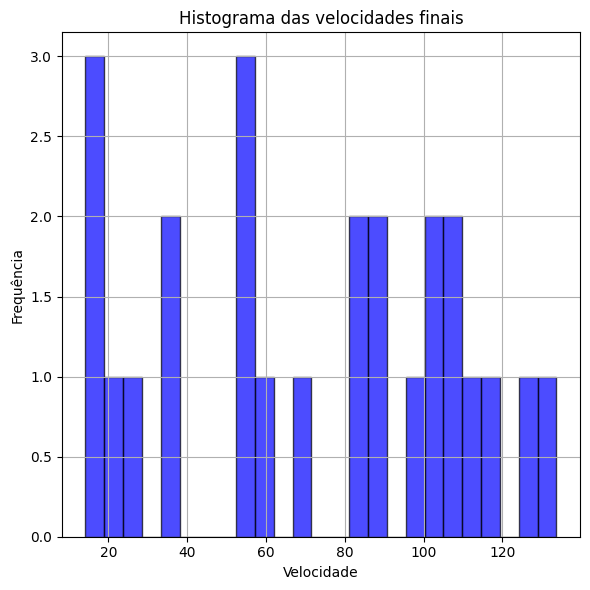

SystemExit: 

C:\venv\ilumpy-VS\lib\site-packages\IPython\core\interactiveshell.py:3516: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [9]:
#Debugging 01-09-2023
#UI == pygame
#Implementado gráfico Max-Boltz
#Teste de colisao por grids
#Colisões funcionam (inherited from ver5)
import math
import random
import pygame
from pygame.locals import *
from sys import exit
import numpy as np
import matplotlib.pyplot as plt

# Constants
FPS = 120
dt = 1/FPS
altura_caixa = 500
largura_caixa = 500
num_particulas = 25
grid_size = 10

# Colors
WHITE = (255, 255, 255)

class Particula:
    def __init__(self, massa, raio, vel_x, vel_y, x, y, cor):
        self.massa = float(massa)
        self.raio = float(raio)
        self.vel_x = float(vel_x)
        self.vel_y = float(vel_y)
        self.x = float(x)
        self.y = float(y)
        self.cor = cor

    def deslocar(self):
        self.x += self.vel_x * dt
        self.y += self.vel_y * dt

        # Colisao parede
        if self.x < self.raio or self.x > largura_caixa - self.raio:
            self.vel_x *= -1
        if self.y < self.raio or self.y > altura_caixa - self.raio:
            self.vel_y *= -1

def grid_collision_checker(particles, grid_size):
    # Create an empty grid
    grid = {}

    # Partition particles into grid cells
    for particle in particles:
        grid_x = int(particle.x / grid_size)
        grid_y = int(particle.y / grid_size)
        
        # Add the particle to the corresponding grid cell
        if (grid_x, grid_y) not in grid:
            grid[(grid_x, grid_y)] = []

        else:
            grid[(grid_x, grid_y)].append(particle)

    # Check for collisions within each grid cell and neighboring cells
    for cell_x in range(-1, 2): #3x3 grid division
        for cell_y in range(-1, 2):
            for (grid_x, grid_y), cell_particles in grid.items():
                neighbor_x = grid_x + cell_x
                neighbor_y = grid_y + cell_y
                
                # Check if the neighboring cell exists in the grid
                if (neighbor_x, neighbor_y) in grid:
                    neighbor_cell_particles = grid[(neighbor_x, neighbor_y)]
                    
                    # Check for collisions between particles in the current cell and the neighboring cell
                    for particle1 in cell_particles:
                        for particle2 in neighbor_cell_particles:
                            if particle1 is not particle2:
                                check_collision(particle1, particle2)
                                    #print(f"Collision detected between particles {particle1} and {particle2}.")

def check_collision(p1, p2):
    distance = math.sqrt((p2.x - p1.x)**2 + (p2.y - p1.y)**2)
    if distance <= p1.raio + p2.raio:
        return True
    else:
        return False

def resolve_collision(p1, p2):
    x1 = np.array([p1.x, p1.y])
    x2 = np.array([p2.x, p2.y])

    v1 = np.array([p1.vel_x, p1.vel_y])
    v2 = np.array([p2.vel_x, p2.vel_y])

    new_v1 = v1 - (((2 * p2.massa) / (p1.massa + p2.massa)) * ((np.dot((v1 - v2), (x1 - x2))) / ((np.linalg.norm(x1 - x2))**2)) * (x1 - x2))
    new_v2 = v2 - (((2 * p1.massa) / (p1.massa + p2.massa)) * ((np.dot((v2 - v1), (x2 - x1))) / ((np.linalg.norm(x2 - x1))**2)) * (x2 - x1))

    p1.vel_x = new_v1[0]
    p1.vel_y = new_v1[1]
    p2.vel_x = new_v2[0]
    p2.vel_y = new_v2[1]

def gerar_particula(n_particulas, largura_caixa, altura_caixa):
    particulas = {}
    for particle_index in range(1, n_particulas + 1):
        massa = 10
        raio = 10
        vel_x = random.uniform(-100, 100)
        vel_y = random.uniform(-100, 100)
        x = random.uniform(raio, largura_caixa - raio)
        y = random.uniform(raio, altura_caixa - raio)
        cor = (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
        nome_particula = f"particula_{particle_index}" 
        particle_instance = Particula(massa, raio, vel_x, vel_y, x, y, cor)
        particulas[nome_particula] = particle_instance
    return particulas

def intersection_pos_checker(particles,iteration_max = 100):
    iteration_count = 0
    intersection = False
    for particle_name, particle_instance in particles.items():
        for other_particle_name, other_particle_instance in particles.items():
            if particle_name != other_particle_name and check_collision(particle_instance, other_particle_instance):
                particle_move = random.choice([[particle_name,particle_instance], [other_particle_name,other_particle_instance]])
                new_x = random.uniform(particle_move[1].raio, largura_caixa - (particle_move[1].raio))
                new_y = random.uniform(particle_move[1].raio, altura_caixa - (particle_move[1].raio))
                particles[particle_move[0]].x = new_x
                particles[particle_move[0]].y = new_y
                iteration_count +=1
                print(particles[particle_move[0]].y)

                intersection = True
                #particles = dict(particles_items) #atualizado
                if iteration_max == iteration_count:
                    warnings.warn(f'{iteration_max} iterações atingidas. Deve haver partículas sobrepostas. Altere o tamanho da caixa.')
                    return particles


    
    if intersection == True:
        print('True')
        return intersection_pos_checker(particles)

    if intersection == False:
        print('False')
        return particles



def create_particle_sprites(particles):
    sprites = pygame.sprite.Group()
    for particle_instance in particles.values():
        circle = pygame.Surface((particle_instance.raio * 2, particle_instance.raio * 2), pygame.SRCALPHA)
        pygame.draw.circle(circle, particle_instance.cor, (particle_instance.raio, particle_instance.raio), particle_instance.raio)
        sprite = pygame.sprite.Sprite()
        sprite.image = circle
        sprite.rect = sprite.image.get_rect(center=(particle_instance.x, particle_instance.y))
        sprites.add(sprite)
    return sprites

def main():
    final_speeds = []
    pygame.init()
    screen = pygame.display.set_mode((largura_caixa, altura_caixa))
    pygame.display.set_caption("Collision Simulation")

    particles = gerar_particula(num_particulas, largura_caixa, altura_caixa)
    particles = intersection_pos_checker(particles)
    sprites = create_particle_sprites(particles)

    clock = pygame.time.Clock()

    while True:
        for event in pygame.event.get():
            if event.type == QUIT:
                pygame.quit()
                # Pegar velocidades finais de todas as particulas
                for particle_instance in particles.values():
                    final_speed = math.sqrt(particle_instance.vel_x**2 + particle_instance.vel_y**2)
                    final_speeds.append(final_speed)

                # Barplot/histograma das velocidades Max-Boltz.
                fig, ax = plt.subplots(figsize=(6, 6))  # Cria caixa para plot
                plt.hist(final_speeds, bins=25, color='blue', edgecolor='black', alpha=0.7)
                plt.xlabel('Velocidade')
                plt.ylabel('Frequência')
                plt.title('Histograma das velocidades finais')
                plt.grid(True)
                fig.tight_layout()
                fig.savefig("max-boltz_6_5.png")  # Salva a figura

                plt.show()
                exit()

        for particle_name, particle_instance in particles.items():
            for other_particle_name, other_particle_instance in particles.items():
                if particle_name != other_particle_name and check_collision(particle_instance, other_particle_instance):
                    resolve_collision(particle_instance, other_particle_instance)

            particle_instance.deslocar()

        for sprite, particle_instance in zip(sprites, particles.values()):
            sprite.rect.center = (particle_instance.x, particle_instance.y)

        screen.fill(WHITE)
        sprites.draw(screen)

        pygame.display.flip()
        clock.tick(FPS)


if __name__ == "__main__":
    main()


In [2]:
altura_caixa = 300
largura_caixa = 300
num_particulas = 20

In [3]:
particulas = gerar_particula(num_particulas, altura_caixa, largura_caixa)

In [4]:
lst_o = []
for name, c in particulas.items():
    lst_o.append(c.y)
print(lst_o)

[79.41880021443711, 185.75112585819005, 84.37776866188516, 160.29558224033576, 195.53980058265861, 237.4320793959471, 36.0800539622646, 244.93796670290257, 201.5879155964626, 105.08018754327317, 107.17410031954682, 71.2062239474973, 222.75430792265433, 201.5945506513856, 158.05867626230457, 212.00311449686234, 196.52926439686198, 190.75143591908514, 227.03301024207417, 178.71565991046614]


In [ ]:
def intersection_pos_checker(particles,iteration_max = 100):
    iteration_count = 0
    intersection = False
    for particle_name, particle_instance in particles.items():
        for other_particle_name, other_particle_instance in particles.items():
            if particle_name != other_particle_name and check_collision(particle_instance, other_particle_instance):
                particle_move = random.choice([[particle_name,particle_instance], [other_particle_name,other_particle_instance]])
                new_x = random.uniform(particle_move[1].raio, largura_caixa - (particle_move[1].raio))
                new_y = random.uniform(particle_move[1].raio, altura_caixa - (particle_move[1].raio))
                particles[particle_move[0]].x = new_x
                particles[particle_move[0]].y = new_y
                iteration_count +=1
                print(particles[particle_move[0]].y)

                intersection = True
                #particles = dict(particles_items) #atualizado
                if iteration_max == iteration_count:
                    print(f'numero maximo ({iteration_max} iteracoes) atingido')
                    return particles


    
    if intersection == True:
        print('True')
        return intersection_pos_checker(particles)

    if intersection == False:
        print('False')
        return particles

Error: Session cannot generate requests

In [6]:
particulas_new = intersection_pos_checker(particulas)
print(type(particulas_new))

141.9515717009811
130.69342615212005
True
False
<class 'NoneType'>


In [7]:
lst_z = []
for name, c in particulas_new.items():
    lst_z.append(c.y)
print(lst_z)

AttributeError: 'NoneType' object has no attribute 'items'

In [23]:
if lst_o != lst_z:
    print('deu caraioo')

else:
    print('deu nao')

deu nao


In [12]:
for name, c in particulas.items():
    print(c.x, c.y)

192.54930698701213 276.62559220301233
394.2237858996529 486.7831752846344
262.4821068338077 373.20880652501364
178.441082879761 489.36555768729465
64.09125602168882 52.30676240595025
29.73802391425913 342.71677940041747
169.36115894776952 319.17462148426415
289.6114603589089 383.3235981261336
271.40217751740124 298.2760321352243
271.2382327573854 245.61117409908155
487.46493156185977 12.287649644607583
281.96213122629695 181.83352288316266
299.12009372322234 197.11341590761268
37.46154483109754 52.56354077163099
11.223832737400734 435.3580718658969
214.4656708997345 385.4579453675597
377.6135888866861 180.7489710866038
65.86041490831256 350.909166145689
33.19225438341199 269.34746803007056
149.69491697790295 186.60194762761594


In [ ]:
for name, c in particulas_new.items():
    print(c.x, c.y)

456.6075827847704 268.0256771392911
42.572045974959636 143.49995084801435
453.2546619427777 488.10179969959506
482.4826551634319 46.691789442153095
44.330999195611334 181.38055660322098
105.58366571423115 450.8530575013124
458.7609810713891 204.82806028798282
197.4882758318372 397.22388773912525
138.25584991141898 307.0262893769465
355.5534537636871 471.8085023323462
347.5678535694302 336.6477041514635
473.45725003218206 15.108223281368858
83.35281671264474 102.43862016618095
388.1134091924796 21.265127082652207
122.48783020905526 89.15659812826237
65.11055347981589 55.76237863563408
255.47274894712478 380.39238512827256
65.33194900750743 119.71225896165416
32.53506716175865 393.96328689908523
319.5073580129466 354.3170083453945
189.2528051495901 227.87147045860115
236.17252164143943 284.26287488962384
112.0865674144455 359.4560294091875
218.15091086227395 477.3721151201531
113.48064027629951 321.96124475344095


In [ ]:
if particulas == particulas_new:
    print('nao modificou')

else:
    print('modificou')

nao modificou


In [ ]:
def check_collision(p1, p2):
    distance = math.sqrt((p2.x - p1.x)**2 + (p2.y - p1.y)**2)
    if distance <= p1.raio + p2.raio:
        return True
    else:
        return False


In [ ]:
intersection_pos_checker(particulas)

(array([1, 2, 3, 5, 6, 8, 9], dtype=int64),)
(array([2, 3, 5, 6, 8, 9], dtype=int64),)
(array([], dtype=int64),)
(array([2, 5, 6, 8, 9], dtype=int64),)
(array([0, 1, 2, 3, 5, 6, 8, 9], dtype=int64),)
(array([2, 6, 8, 9], dtype=int64),)
(array([2], dtype=int64),)
(array([0, 1, 2, 3, 4, 5, 6, 8, 9], dtype=int64),)
(array([2, 6, 9], dtype=int64),)
(array([2, 6], dtype=int64),)
